# **About the dataset**
The dataset we will be using here is the Wine Quality data containing certain information about red and white wine.

Quality of the wine is based on sensory scores (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

This popular dataset is commonly used for predicting whether a particular wine is “good quality” or not.

In [ ]:
import pandas as pd      # This is the basic package for linear algebra and multidimensional array
import numpy as np       # Data analysis and manipulation tool

# To ignore warning
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading Data - After checking the data, data is separated by ";" instead of the default separator ","
# Add (sep=";") to the code
red_wine_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv", sep=";")

# **Data Analysis Techniques**

**Initial Review of Data**

In [ ]:
# To get the first 5 records using ".head()"; you can pass the number of record you want into () Eg. .head(7) or .head(10) and so on
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# To get the last 5 records using ".tail()"; you can pass the number of record you want into () Eg. .tail(7) or .tail(10) and so on
red_wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Find out the total number of rows and columns in the dataset using “.shape”.
red_wine_data.shape

(1599, 12)

Observations:



*  Dataset comprises 1599 observations(rows) and 12 features(columns).
*  Out of the 12, one is the target variable and rest 11 are input variables.



In [ ]:
# To get a Statistical Overview using ".describe()"
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
*   Here the Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. To better understand, let's assume that we have a data set with values: 2, 4, 6, 30. The mean value: 10.5, which is lower than the median of the data (5), is greatly affected by the extreme data point(30).
*   There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile)

Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.

In [ ]:
# To get a summary of categorical columns separately, then we can use the parameter 'include'.
#red_wine_data.describe(include="object")
#red_wine_data.describe(include="all")
red_wine_data.describe(include="int")

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


**Exploring the Features**

In [ ]:
# To explore the features/columns of the datasets.
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Observations:

*   Six (6) columns contain spaces in their names
*   Will need to replace the spaces with underscores to allow python to be able to read them.

**Target Variable:**
The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.
Here, ***quality*** is the target variable

**Input Variable:**
One or more variables that are used to determine (or predict) the 'Target Variable' are known as ***Input Variables***. They are sometimes called Predictor Variable as well.

In [ ]:
# Target Variable is "quality"
# To obtain the Unique Values of Quality (Target Variable) using ".unique()"

red_wine_data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

Observations:

The following are some of the key insights that are observable by just looking at the target variable:

*   Target variable/Dependent variable is discrete and categorical in nature.
*   “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
*   1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.







In [ ]:
# To get the Frequency Counts of each Quality Value using ".value_counts()"
# To get the number of occurrences of each unique values

red_wine_data["quality"].value_counts()
red_wine_data.value_counts("quality")

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


Observations:


* This tells us the vote count of each quality score in descending order.
* “quality” has most values concentrated in the categories 5, 6 and 7.
* Only a few observations made for the categories 3 & 8.





**Renaming Columns**

'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', and 'total sulfur dioxide'

In [ ]:
# rename the columns which contain spaces in their names and replace the spaces with underscores
red_wine_data.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar": "residual_sugar", "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide" }, inplace = True)

In [ ]:
red_wine_data.columns  # Check to confirm if the change has been effected

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Checking for Missing Values**

In [ ]:
# To detect missing values using "isnull()" or  "isna()" functions. Both of them do the same thing.
# Here the "isnull()" or  "isna()" functions detects the missing values while
# ".sum()" helps display the number of missing values in each column

# 1st Test
red_wine_data.isnull().sum()

# 2nd Test
red_wine_data.isna().mean()

,0
fixed_acidity,0.0
volatile_acidity,0.0
citric_acid,0.0
residual_sugar,0.0
chlorides,0.0
free_sulfur_dioxide,0.0
total_sulfur_dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


Observation:

There is no missing value in any column

In [ ]:
# returns information about the data frame including:
# data types of each column,
# number of null values in each column,
# and memory usage of the entire data.

red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations:

* The data has only float and integer values.
* There are no missing values


**Checking for Duplicates**

Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.

In [ ]:
# Method 1:
duplicate_entries = red_wine_data.duplicated()
duplicate_entries.sum()

# Method 2:
duplicate_entries = red_wine_data[red_wine_data.duplicated()]
duplicate_entries.shape

(240, 12)

Observations:

There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

# **Graphical Techniques**

**Importing Data Visualization Libraries**

In [ ]:
# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Separating Input and Target Variables**

First, we’ll be separating the input and target variables and assign them to X and y respectively so that we can directly access either of those when required.

In [ ]:
y = red_wine_data["quality"]       # Set quality as the "Target" variable. NB: you can also use y = red_wine_data.quality
x = red_wine_data.drop("quality", axis = 1)    # All column except quality are input columns

In [ ]:
y.head()
# y.shape

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
x.head()
x.shape

(1599, 11)

Observations:
*   Dataset comprises 1599 observations(rows) and 11 input features(columns).
*   X now contains all the features except Quality.
*   y contains Quality.







**Histogram**



*   The key is that a histogram looks solely at quantitative variables while a bar chart looks at categorical variables.
*  That’s why the bars in a histogram are typically grouped together without spacing in between the bars.





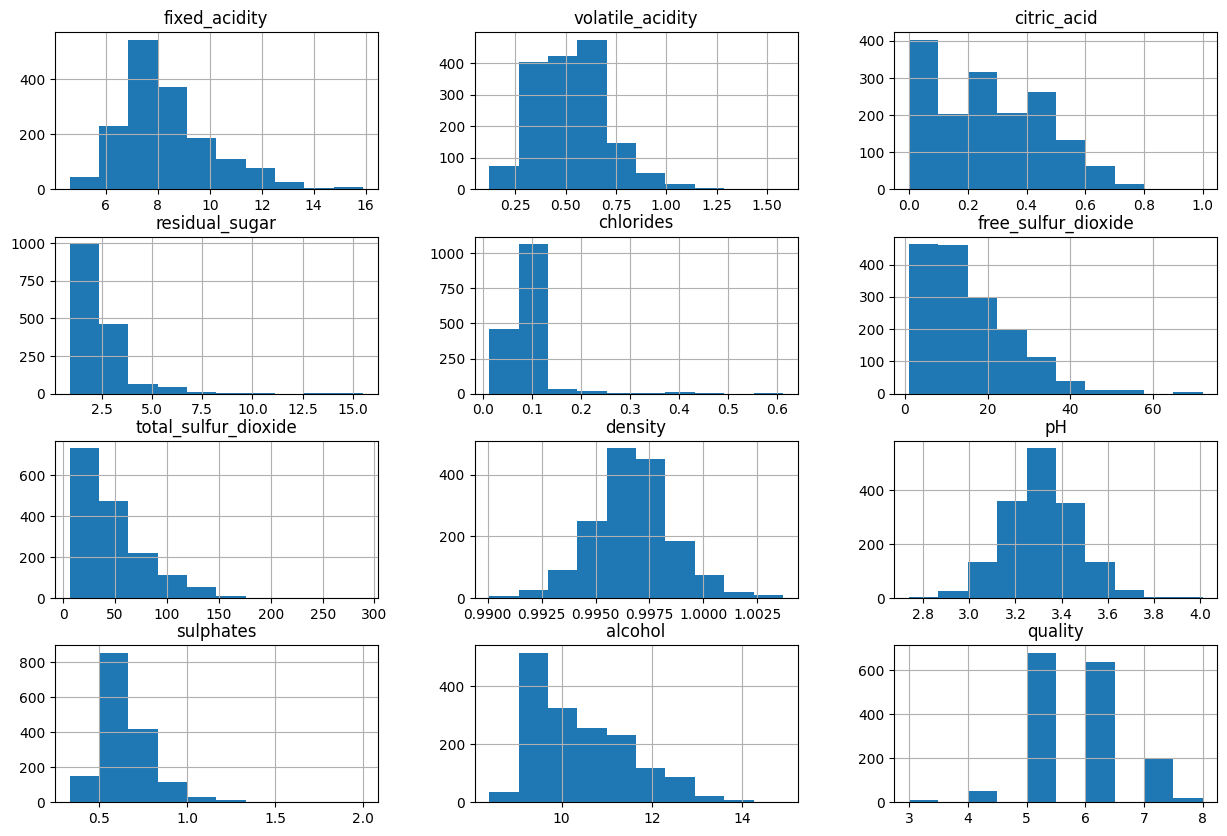

In [ ]:
# To plot a histogram by calling the hist() method on the DataFrame "red_wine_data",
# Output: get histograms for all the Series.

red_wine_data.hist(bins=10, figsize=(15,10))
plt.show()

**Observations:**

**Overview:**
Apart from "Alcohol", "Density", and "pH" that are somewhat like a normal distributions, all other variable expect "quality" are mostly skewed to the right.

**Alcohol:** The distribution appears somewhat normal, with a peak around 9-10.5.

**Density:** This variable appears to be tightly clustered around a specific value, with a distribution that is close to normal but very narrow.

**pH:** The distribution looks somewhat like a normal distribution, centered around 3.3.

**Sulphates:** The distribution is skewed to the right, with most values concentrated at the lower end and a long tail extending to higher values.

**Total Sulfur Dioxide:** This distribution is heavily skewed to the right, indicating the presence of outliers with high values.

**Free Sulfur Dioxide:** Similar to total sulfur dioxide, this distribution is also skewed to the right.

**Chlorides:** This distribution is highly skewed to the right, with a large concentration of values near zero and a long tail of higher values.

**Residual Sugar:** This distribution is also skewed to the right, with most values between 1 and 2.

**Citric Acid:** The distribution is skewed to the right, with a large number of wines having zero citric acid and a tail extending to higher values.

**Volatile Acidity:** The distribution is skewed to the right, with a peak around 0.4-0.6.

**Fixed Acidity:** The distribution is somewhat skewed to the right, with a peak around 7-8.

**Quality:** The histogram for quality shows that the majority of wines have a quality rating of 5 or 6, with fewer wines having ratings of 3, 4, 7, or 8. This confirms the observation made earlier from .value_counts().

These observations can help you understand the characteristics of the dataset and identify potential issues like skewed distributions or the presence of outliers, which might need to be addressed during data preprocessing for machine learning models.